# Convolution Neural Network 

Image processsing and implement convolution neural networks - LeNet-5 . \

**Runtime Type: GPU**

**Task Overview:**
- Basic operations for Digital Image Processing (DIP)
- LeNet-5

## 1 - Basic Image Processing ##
### 1.1 Data Preparation 

Import useful packages and prepare image data as an array for image processing. 


References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [imageio](https://imageio.github.io/) is a python library for basic image reading and writing.


Image data "./image.jpg".


In [ ]:
# Import useful libraries
import numpy as np
import imageio
from IPython.display import Image, display
import matplotlib.pyplot as plt 
 
# Display original image
display(Image(filename = "image.jpg"))


# Convert image to array, print out the shape of array, and print out the entire array
img = imageio.imread('image.jpg') 
print ("Shape of array ", img.shape)
print("Entire array")
print(img)


Shape of array  (30, 30)
Entire array
[[ 98  89  78 112  90  93 158 112 122 117 107 121  90  75  67  93  73  67
   96 152 167 151 166 154 134 105  53  51  55  44]
 [ 34  31  51  38  16  50 195 161 138 173 200 209 194 206 222 237 223 195
  177 185 167 160 166 169 136  98  49  54  55  35]
 [ 78  84  94  71  81  69 190 204 233 240 249 234 232 241 250 235 235 236
  224 194 169 181 170 162 121  95  55  49  52  47]
 [ 79  58  90 127 103 137 253 244 254 222 223 219 235 228 232 206 201 215
  201 106 105 137 169 173 124  81  45  49  59  53]
 [ 31  75  44  81  89 191 242 255 228 208 231 233 236 222 227 199 177 192
  208 104 137 109 170 194 159  88  44  54  63  46]
 [ 85  66  51 145 129 225 239 206 242 233 247 231 210 218 232 202 190 173
  181  95 146  39 132 199 178 145 103  53  44  65]
 [ 81  60  76 178 216 214 209 230 240 229 230 211 157 176 214 218 185 186
  198 154 203  33 100 157 157 179 162  72  39  78]
 [104  89 152 176 168 117 182 226 242 235 238 207  82  50  94 145 136 157
  148 119 175

### 1.2 Implementation of Convolution Filter

Process the obtained array from the image with convolution operation.

**Tasks:**
1. Prepare a 3X3 Laplacian kernel (aka Laplacial filter) with array as convolution filter.
2. Conduct convolution on image with prepared kernel.
3. Print out convolution result for first ten rows.
4. Print out the shape of the convolution result.
5. Display convolution result as image with matplotlib.


1. Laplacian kernel is widely used for edge detection. Its form is shown below:
2.
    2.1 Extract all centriods of processing region for each convolution operation.\
    2.2 According to each centroid, locate all indices of the elements within the local region for each convolution operation.\
    2.3 Given obtained indices, locate pixel values and conduct element-wise product between pixel and kernel values.\
    2.4 Sum element-wise product results and assign the value to convolution result at corresponding location.\
  
Validation for first 5X5 array,
filtered_results[0:5,0:5] 

[[ 134.   37.   98.  195.  173.]\
 [ -75.  -80.   56.  -65.  182.]\
 [  96.  -37. -163.   22.   68.]\
 [-101.  121.   81.  148.  -71.]\
 [   7.  127. -141.  159. -127.]]

![image.png](attachment:image.png)

[[ 134.   37.   98.  195.  173.]
 [ -75.  -80.   56.  -65.  182.]
 [  96.  -37. -163.   22.   68.]
 [-101.  121.   81.  148.  -71.]
 [   7.  127. -141.  159. -127.]]

Shape of the convolution result (28, 28)


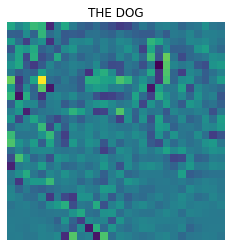

In [ ]:
######## Convolution with Laplacian Filter ##################

kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
size = (img[0].size - kernel[0].size) + 1
conv_img = np.zeros([size, size])

for i in range(size):
  for j in range(size):
    conv_img[i][j] = np.sum(kernel * img[i:i+3, j:j+3])

print(conv_img[0:5,0:5])

print("\nShape of the convolution result", conv_img.shape)

plt.imshow(conv_img) 
plt.axis('off') 
plt.title('THE DOG') 
plt.show() 
  

### 1.3 Modification on Convolution Scheme

Conduct the convolution with the same filter as above, but change the stride to 

1. Reduce the centroid pool according to stride=2.
    **Note: After increase of stride, the size of convolution result is further shrinked.**

Validation for first 5X5 array, filtered_results[0:5,0:5].

[[ 134.   98.  173.    5.    3.]\
 [  96. -163.   68.  -10.   37.]\
 [   7. -141. -127.  142.   -6.]\
 [  -1.  -46.  109.  -13.   11.]\
 [ 106.   49.  241.  -26.  -33.]]

[[ 134.   98.  173.    5.    3.]
 [  96. -163.   68.  -10.   37.]
 [   7. -141. -127.  142.   -6.]
 [  -1.  -46.  109.  -13.   11.]
 [ 106.   49.  241.  -26.  -33.]]

Shape of the convolution result (14, 14)


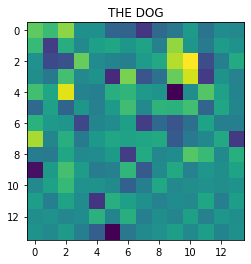

In [ ]:
######## Convolution with Laplacian Filter and the setting of stride=2 ##################
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
size = int((img[0].size - kernel[0].size) + 1) / 2
conv_img = np.zeros([int(size), int(size)])


for i in range(0, len(img) - 2, 2):
  for j in range(0, len(img) - 2, 2):
    conv_img[int(i/2)][int(j/2)] = np.sum(kernel * img[i:i+3, j:j+3])

    
 
print(conv_img[0:5,0:5])

print("\nShape of the convolution result", conv_img.shape)

plt.imshow(conv_img) 
#plt.axis('off') 
plt.title('THE DOG') 
plt.show() 

### 1.4 Implementation of MaxPooling

Process the obtained array from the image with MaxPooling operation.

**Tasks:**
1. Prepare a 2X2 pooling mask.
2. Conduct max pooing on image with prepared mask.
3. Print out convolution result for first ten rows.
4. Print out the shape of the convolution result.
5. Display convolution result as image with matplotlib.

Validation for first 5X5 array, pooled_results[0:5,0:5]

[[ 98. 112.  93. 195. 173.]\
 [ 84. 127. 137. 253. 254.]\
 [ 85. 145. 225. 255. 242.]\
 [104. 178. 216. 230. 242.]\
 [ 95. 186. 147. 248. 242.]]

[[ 98. 112.  93. 195. 173.]
 [ 84. 127. 137. 253. 254.]
 [ 85. 145. 225. 255. 242.]
 [104. 178. 216. 230. 242.]
 [ 95. 186. 147. 248. 242.]]

Shape of the convolution result (15, 15)


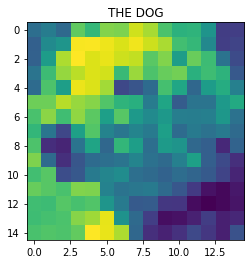

In [ ]:
######## MaxPooling with the setting of 2X2 ##################
pooling_mask = np.zeros([2,2])
size = int((img[0].size - pooling_mask[0].size) + 2)/2
pooling_img = np.zeros([int(size), int(size)])

for i in range(0, len(img) - 1, 2):
  for j in range(0, len(img) - 1, 2):
    pooling_img[int(i/2)][int(j/2)] = np.max(img[i:i+2, j:j+2])
 
print(pooling_img[0:5,0:5])

print("\nShape of the convolution result", pooling_img.shape)

#plt.axis('off')
plt.title('THE DOG') 
plt.imshow(pooling_img)  
plt.show() 

## 2 - Convolution Neural Network ##
 
Use LeNet-5 (LeCun et al., 1998), one of representative deep nueral networks, to solve a  classification problem with Fashion MNIST benchmark.

### 2.1 Library Preparation

Import useful deep learning packages. 


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from matplotlib import pyplot
import matplotlib.pyplot as plt

### 2.2 Training Data Preparation

Import useful packages and prepare Fashion MNIST data.

**Tasks:**
1. Download Fashion MNIST data and split it with keras and prepare training/test data sets.
2. Preprocess training/test data with normalization, dimension extension, and padding (for LeNet-5 configuration).
3. Preprocess label data to binary class matrices.
4. Print out first image in training set and its correponding label index
5. Print out the shape of total training data, the number of training samples, and the number of test samples.


1. Load function from the reference link. https://keras.io/api/datasets/ It provides dataloader function which can tackle downloading and data splitting automatically.
2. For label preprocessing, **keras.utils.to_categorical** to convert class vectors to binary class matrices. This conversion makes sure the label can match the format of prediction output from neural network.
3. For image display, show the image and label **before dimension extension and label preprocessing**.

- Fashion MNIST https://github.com/zalandoresearch/fashion-mnist


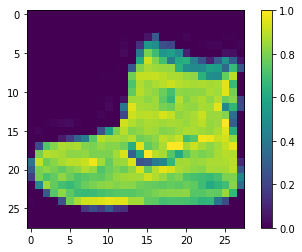

x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


In [ ]:
# the data, split between train and test sets
fashion_mnist = tf.keras.datasets.fashion_mnist

#returns (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 1)

# Image Normalization (Scaling to [0, 1])
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Print out first image and its correponding label index
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Dimension extension to ensure that images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Conduct padding on training/test images to (32, 32, 1) for LeNet-5
x_train = np.pad(x_train, ((0,0), (2,2), (2,2), (0,0)), 'constant')
x_test = np.pad(x_test, ((0,0), (2,2), (2,2), (0,0)), 'constant')

# Print out the training/test data shapes and the numbers of training/test samples
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert label vectors to binary class matrices for training/test labels 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


### 2.2 LeNet-5 

Construct LeNet-5 as learning model for Fashion MNIST classification task. 

**Tasks:**
1. Build up LeNet-5 with keras.Sequential
2. Print out the **model summary**.

- http://yann.lecun.com/exdb/lenet/


In [ ]:
### Construct LeNet-5 and Print out Model Summary
model = keras.Sequential(   
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5, 5), kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #layers.Dropout(0.5),
        layers.Dense(120, kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.Dense(84, kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.Dense(10, kernel_regularizer=regularizers.l2(4e-5), activation="softmax")
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_14 (Dense)             (None, 84)               

### 2.3 LeNet-5 Model Training

Train LeNet-5 model with specific training strategy. 

**Tasks:**
1. Set batch size to **64** for training. 
2. Pick **SGD optimizer** with learning rate of **0.1**, learning rate decay of **4e-5** (i.e., decay=4e-5), momentum of **0.9**, and **nesterov=True**, for model training.
3. Pick **cross-entropy** loss function for optimization and evaluation metrics is set to **accuracy**.
4. Set validation_split to **0.1** which means it excludes 1/10 training data for validation process.
4. Train the model with **10 epochs**.
5. Evaluate model with test data set and print out **test loss** and **test accuracy**.

Keras to specify optimizer parameters. https://keras.io/api/optimizers/

Validation accuracy is above **87%**.

Epoch 1/10
844/844 [==============================] - 3s 4ms/step - loss: 0.5860 - accuracy: 0.7967 - val_loss: 0.4234 - val_accuracy: 0.8510
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4275 - accuracy: 0.8539 - val_loss: 0.4235 - val_accuracy: 0.8620
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4075 - accuracy: 0.8615 - val_loss: 0.4280 - val_accuracy: 0.8585
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3954 - accuracy: 0.8664 - val_loss: 0.4707 - val_accuracy: 0.8507
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3893 - accuracy: 0.8700 - val_loss: 0.4170 - val_accuracy: 0.8703
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3810 - accuracy: 0.8743 - val_loss: 0.4015 - val_accuracy: 0.8737
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3817 - accuracy: 0.8748 - val_loss: 0.4315 - val_accuracy: 0.8682
Epoch 

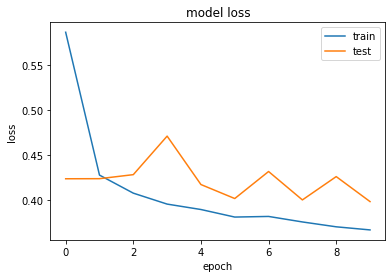

In [ ]:
### Train with SGD optimizer with learning rate =0.1, regularizer=4e-5, momentum=0.9, and nesterov=True
batch = 64
epochs = 10

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(
    loss="categorical_crossentropy", 
    optimizer=optimizer, 
    metrics=["accuracy"]
)

history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1)

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
### Print out the evaluation results, including test loss and test accuracy.
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0]*100)
print("Test accuracy:", score[1]*100)


Test loss: 41.876572370529175
Test accuracy: 86.84999942779541


### 2.4 Different Training Schemes

Train LeNet-5 model with different strategies.

**Tasks:**
1. Set batch size to **128** 
2. Set optimizer to **Adam** (optimizer="adam") a
3. Change learning rate to **0.05** 

**First graph**


Epoch 1/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3118 - accuracy: 0.8990 - val_loss: 0.3687 - val_accuracy: 0.8825
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2952 - accuracy: 0.9046 - val_loss: 0.3689 - val_accuracy: 0.8837
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2856 - accuracy: 0.9065 - val_loss: 0.3770 - val_accuracy: 0.8872
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2767 - accuracy: 0.9102 - val_loss: 0.3620 - val_accuracy: 0.8880
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2719 - accuracy: 0.9106 - val_loss: 0.3820 - val_accuracy: 0.8873
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2646 - accuracy: 0.9133 - val_loss: 0.3729 - val_accuracy: 0.8860
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2608 - accuracy: 0.9156 - val_loss: 0.3758 - val_accuracy: 0.8885
Epoch 

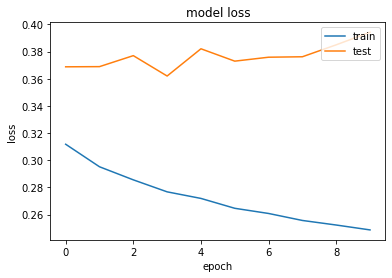

Test loss: 40.44276475906372
Test accuracy: 87.6800000667572


In [ ]:
batch = 128
epochs = 10

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, decay=4e-5, momentum=0.9, nesterov=True)

model.compile(
    loss="categorical_crossentropy", 
    optimizer=optimizer, 
    metrics=["accuracy"]
)

history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1)

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0]*100)
print("Test accuracy:", score[1]*100)

**Second graph**

Epoch 1/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2109 - accuracy: 0.9341 - val_loss: 0.3763 - val_accuracy: 0.8960
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1947 - accuracy: 0.9405 - val_loss: 0.3868 - val_accuracy: 0.8948
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1857 - accuracy: 0.9441 - val_loss: 0.4014 - val_accuracy: 0.8893
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1801 - accuracy: 0.9466 - val_loss: 0.4119 - val_accuracy: 0.8903
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1723 - accuracy: 0.9496 - val_loss: 0.4337 - val_accuracy: 0.8933
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1651 - accuracy: 0.9536 - val_loss: 0.4538 - val_accuracy: 0.8890
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1609 - accuracy: 0.9557 - val_loss: 0.4573 - val_accuracy: 0.8878
Epoch 

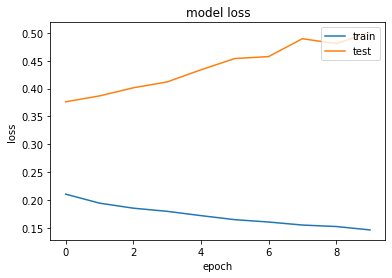

Test loss: 52.08190679550171
Test accuracy: 88.40000033378601


In [ ]:
batch = 64
epochs = 10

model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1)

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0]*100)
print("Test accuracy:", score[1]*100)

**Third graph**

Epoch 1/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2899 - accuracy: 0.9094 - val_loss: 0.4572 - val_accuracy: 0.8805
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2644 - accuracy: 0.9172 - val_loss: 0.4304 - val_accuracy: 0.8812
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2536 - accuracy: 0.9216 - val_loss: 0.4151 - val_accuracy: 0.8883
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2425 - accuracy: 0.9251 - val_loss: 0.4442 - val_accuracy: 0.8812
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2387 - accuracy: 0.9279 - val_loss: 0.4411 - val_accuracy: 0.8808
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2341 - accuracy: 0.9304 - val_loss: 0.4375 - val_accuracy: 0.8850
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2227 - accuracy: 0.9347 - val_loss: 0.4517 - val_accuracy: 0.8825
Epoch 

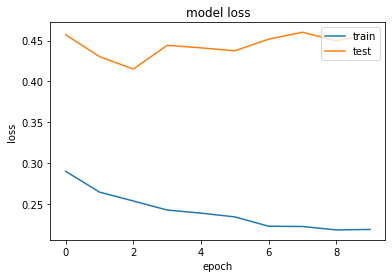

Test loss: 48.62546920776367
Test accuracy: 87.37000226974487


In [ ]:
batch = 64
epochs = 10

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05, decay=4e-5, momentum=0.9, nesterov=True)

model.compile(
    loss="categorical_crossentropy", 
    optimizer=optimizer, 
    metrics=["accuracy"]
)

history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1)

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0]*100)
print("Test accuracy:", score[1]*100)